## Hands on with Open CV library ##
### Understand Open CV and ML on image/ videos ###

In [1]:
import cv2
import numpy as np

In [2]:
# read an image
img = cv2.imread('macaw.jpg')

In [3]:
img.shape

(1481, 705, 3)

In [4]:
# read RGB values at particular pixel
img[50,50]

array([24, 36, 18], dtype=uint8)

In [5]:
img.size

3132315

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

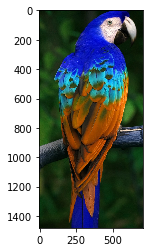

In [7]:
plt.imshow(img)

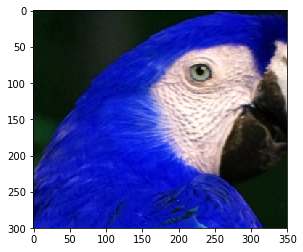

In [8]:
# getting and showing particular part of image
plt.imshow(img[0:300, 250:600])

In [9]:
# Capture video from camera
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html 
# To capture a video, you need to create a VideoCapture object. 
# Its argument can be either the device index or the name of a video file. 
# Device index is just the number to specify which camera. Normally one camera will be connected (as in my case). 
# So I simply pass 0 (or -1). 
# After that, you can capture frame-by-frame. But at the end release the capture.

In [11]:
# Capture video from camera
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read() # cap.read() returns a bool (True/False). If frame is read correctly, it will be True
    ## for my understanding
    #print(type(frame)) # 'numpy.ndarray'
    #print(ret) # Boolean
    ##
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # cv2.cvtColor - does the color conversion

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [15]:
# Playing video from file

cap = cv2.VideoCapture('Wildlife.wmv')

while(cap.isOpened()):
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [12]:
# Saving a video

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
# FourCC is a 4-byte code used to specify the video codec. 
# The list of available codes can be found in fourcc.org. It is platform dependent. 
# Following codecs works fine for me.
# In Windows: DIVX

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480)) # filename, fourcc, fps, framesize

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        #frame = cv2.flip(frame,0) # intentionally we are flipping it

        # write the flipped frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

In [21]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection
    
OpenCV comes with a trainer as well as detector. If you want to train your own classifier for any object like car, planes etc. you can use OpenCV to create one. Its full details are given here: Cascade Classifier Training.

Here we will deal with detection. OpenCV already contains many pre-trained classifiers for face, eyes, smile etc. Those XML files are stored in opencv/data/haarcascades/ folder. Let’s create face and eye detector with OpenCV.

First we need to load the required XML classifiers. Then load our input image (or video) in grayscale mode.    

In [42]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # I copy pasted these xmls in current folder
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [43]:
print(face_cascade)

<CascadeClassifier 0000000008E62750>


In [44]:
eye_cascade

<CascadeClassifier 000000000899A8B0>

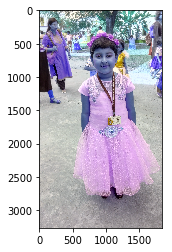

In [45]:
img = cv2.imread('Samriddhi.jpg')
plt.imshow(img)

Now we find the faces in the image. If faces are found, it returns the positions of detected faces as Rect(x,y,w,h).
(x,y) - corner coordinates
(w,h) - width, height

In [46]:
faces = face_cascade.detectMultiScale(img, 1.3, 5) 
# spec for this: https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html
# Detects objects of different sizes in the input image. The detected objects are returned as a list of rectangles.

In [47]:
faces

array([[1053, 1661,   26,   26],
       [ 188,  173,  122,  122],
       [ 759,  523,  433,  433]], dtype=int32)

In [51]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    #roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_color)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.imwrite('Samriddhi_face_detected.jpg',img)
# Use the function cv2.imshow() to display an image in a window. The window automatically fits to the image size.
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.waitKey() is a keyboard binding function. Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke. It can also be set to detect specific key strokes like, if key a is pressed etc which we will discuss below.

cv2.destroyAllWindows() simply destroys all the windows we created. If you want to destroy any specific window, use the function cv2.destroyWindow() where you pass the exact window name as the argument.